# aSPEM Experiment : analysis




In [1]:
!ls data/

psychophysique_chloe_2017-06-21_162644.pkl
psychophysique_chloe_2017-06-22_112137.pkl
psychophysique_laurent_2017-06-22_141053.pkl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


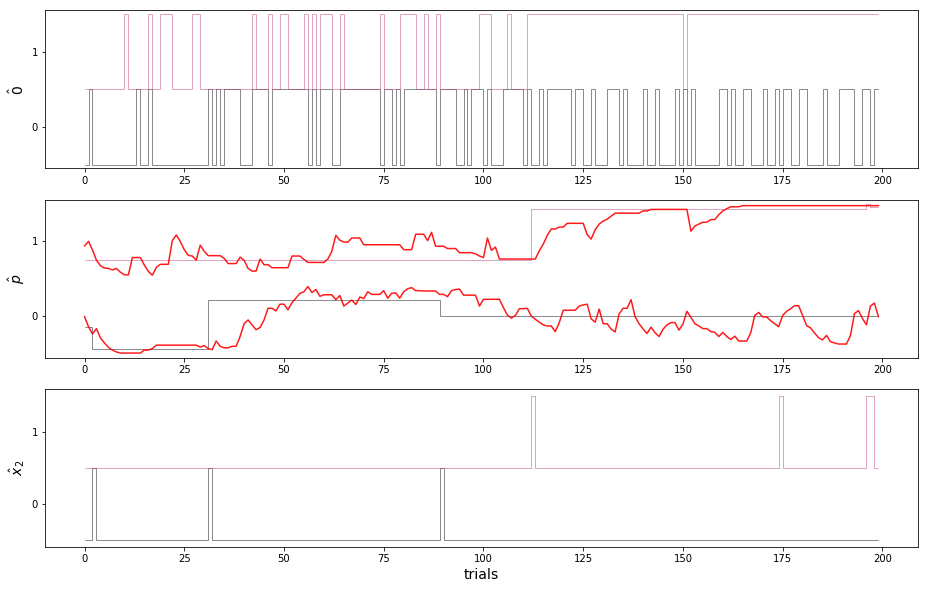

In [9]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import

%matplotlib inline
fig_width = 12

from aSPEM import aSPEM
timeStr = '2017-06-21_162644'
timeStr = '2017-06-22_141053'
observer = 'chloe'
observer = 'laurent'
mode = 'psychophysique'
e = aSPEM(mode, observer, timeStr)

fig, axs = e.plot(mode=mode)

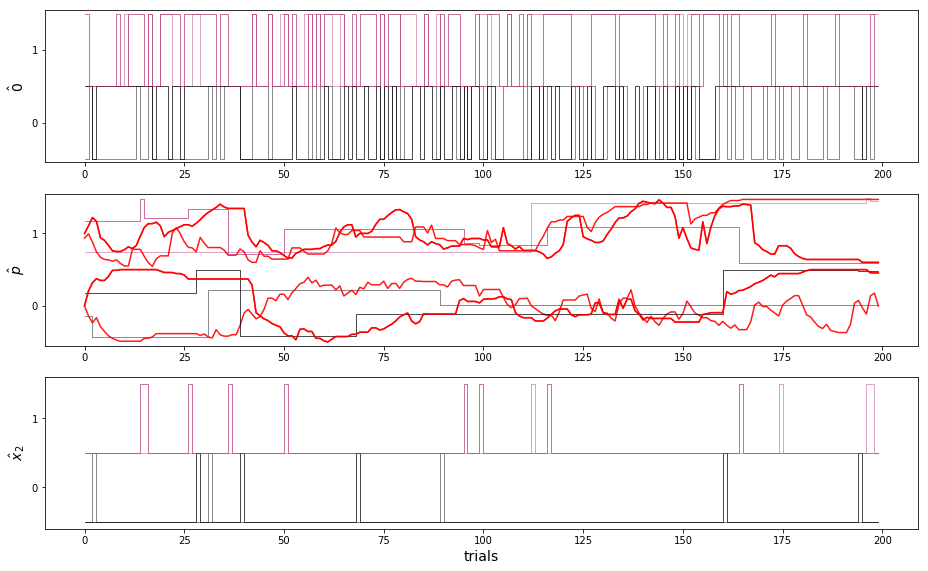

In [11]:
from aSPEM import aSPEM
timeStr = '2017-06-22_112137'
observer = 'laurent'
observer = 'chloe'
mode = 'psychophysique'
e = aSPEM(mode, observer, timeStr)
fig, axs = e.plot(mode=mode)
fig